### t2.micro, AWS Marketplace -> Anaconda with Python 3

### 1) Linear Regression

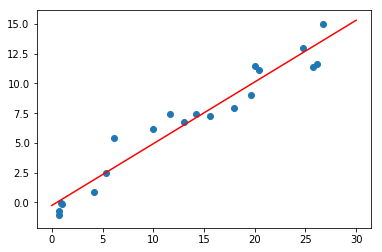

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = 30 * np.random.random((20, 1))
y = 0.5 * x + np.random.normal(size=x.shape)

model = LinearRegression().fit(x, y)

xnew = np.linspace(0, 30, 100)
ynew = model.predict(xnew[:, np.newaxis])

plt.plot(xnew, ynew, color='red')
plt.scatter(x, y)

### 2) Logistic Regression

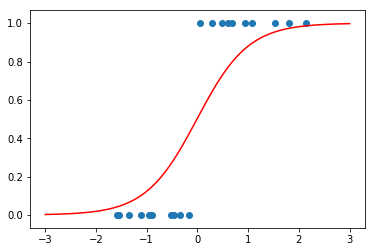

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

def inverselogit(alpha):
  return 1 / (1 + np.exp(-alpha))

x = np.random.normal(size=20)
y = (x > 0).astype(np.float)
x = x[:, np.newaxis]

model = LogisticRegression(solver='lbfgs').fit(x, y)

xnew = np.linspace(-3, 3, 300)
ynew = inverselogit(xnew * model.coef_ + model.intercept_).ravel()

plt.plot(xnew, ynew, color='red')
plt.scatter(x, y)

### 3) Linear Discriminant Analysis

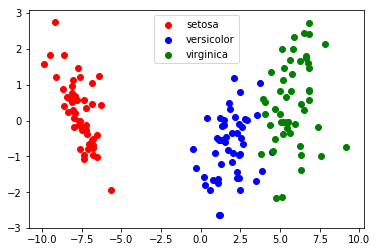

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()
x    = LinearDiscriminantAnalysis().fit_transform(iris.data, iris.target)

for color, target_number, target_name in zip(
                                             ['red', 'blue', 'green'], 
                                             [0, 1, 2]               , 
                                             iris.target_names
                                            ):

    plt.scatter(
                x[iris.target == target_number, 0], 
                x[iris.target == target_number, 1], 
                color = color, 
                label = target_name
               )
plt.legend()

### 4) Decision Tree

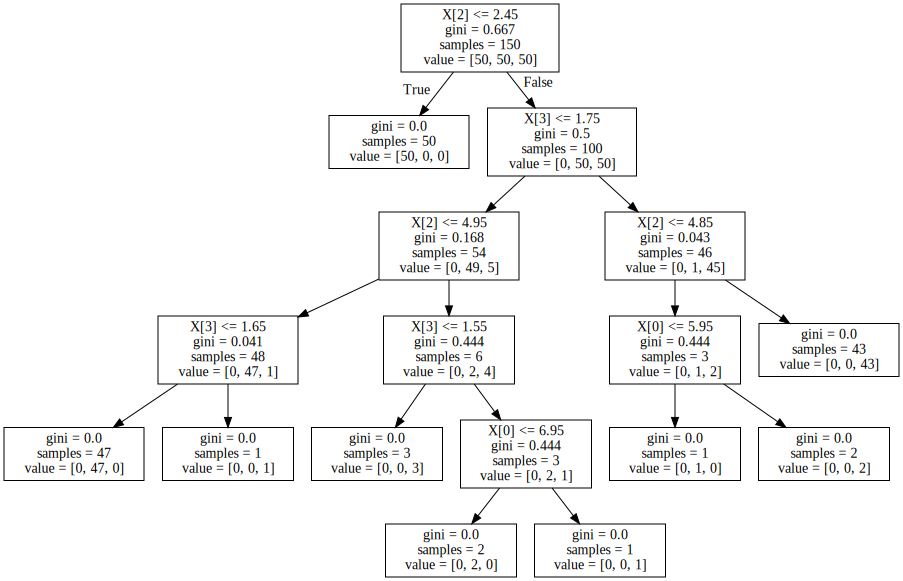

In [1]:
import graphviz
from sklearn import tree
from sklearn.datasets import load_iris

iris = load_iris()
graphviz.Source(tree.export_graphviz(tree.DecisionTreeClassifier().fit(iris.data, iris.target)))

### 5) Naive Bayes

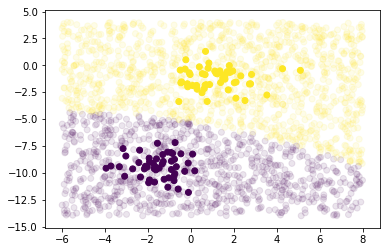

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

x, y  = make_blobs(n_samples=100, centers=2, random_state=2)
model = GaussianNB().fit(x, y)

xnew = [-6, -14] + [14, 18] * np.random.RandomState().rand(2000, 2)
ynew = model.predict(xnew)

plt.scatter(x   [:, 0], x   [:, 1], c=y)
plt.scatter(xnew[:, 0], xnew[:, 1], c=ynew, alpha=0.1)

### 6) K-Means Clustering

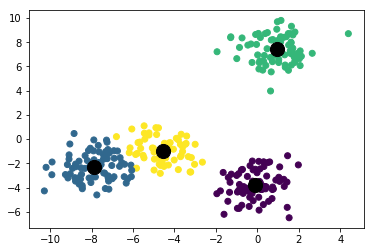

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

x      = make_blobs(n_samples=300, centers=4)[0]
kmeans = KMeans(n_clusters=4).fit(x)

plt.scatter(x[:, 0], x[:, 1], c=kmeans.predict(x))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', s=200)

### 7) Support Vector Machines

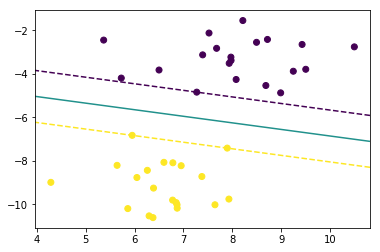

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=40, centers=2, random_state=6)
clf  = svm.SVC(kernel='linear').fit(x, y)

plt.scatter(x[:, 0], x[:, 1], c=y)
gridx, gridy      = np.meshgrid(np.linspace(*plt.gca().get_xlim()), np.linspace(*plt.gca().get_ylim()))
decision_boundary = clf.decision_function(np.c_[gridx.ravel(), gridy.ravel()]).reshape(gridx.shape)
plt.contour(gridx, gridy, decision_boundary, levels=[-1, 0, 1], linestyles=['--', '-', '--'])
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='none')

### 8) Random Forest (Bagging)

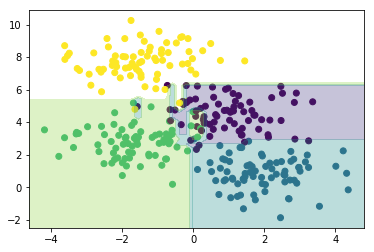

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier

x, y  = make_blobs(n_samples=300, centers=4, random_state=0)
model = DecisionTreeClassifier().fit(x, y)

plt.scatter(x[:, 0], x[:, 1], c=y)
gridx, gridy      = np.meshgrid(np.linspace(*plt.gca().get_xlim()), np.linspace(*plt.gca().get_ylim()))
decision_boundary = model.predict(np.c_[gridx.ravel(), gridy.ravel()]).reshape(gridx.shape)
plt.contourf(gridx, gridy, decision_boundary, alpha=0.3, levels=np.arange(len(np.unique(y))) - 1)

### 9) AdaBoost (Boosting)

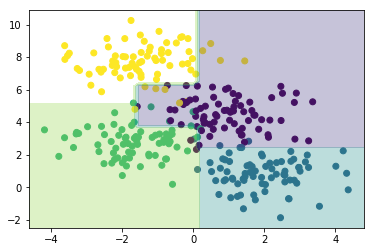

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import AdaBoostClassifier

x, y  = make_blobs(n_samples=300, centers=4, random_state=0)
model = AdaBoostClassifier().fit(x, y)

plt.scatter(x[:, 0], x[:, 1], c=y)
gridx, gridy      = np.meshgrid(np.linspace(*plt.gca().get_xlim()), np.linspace(*plt.gca().get_ylim()))
decision_boundary = model.predict(np.c_[gridx.ravel(), gridy.ravel()]).reshape(gridx.shape)
plt.contourf(gridx, gridy, decision_boundary, alpha=0.3, levels=np.arange(len(np.unique(y))) - 1)

### 10) Principal Component Analysis

original shape:    (500, 2)
pca reduced shape: (500, 1)


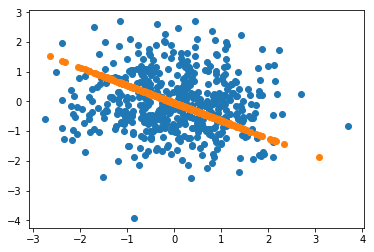

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = np.random.RandomState().randn(500, 2)
pca  = PCA(n_components=1).fit(data)
xpca = pca.transform(data)
xnew = pca.inverse_transform(xpca)

plt.scatter(data[:, 0], data[:, 1])
plt.scatter(xnew[:, 0], xnew[:, 1])

print("original shape:   ", data.shape)
print("pca reduced shape:", xpca.shape)